In [ ]:
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline 
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Data Analysis With Python for Excel Users I - Import Excel File

<!-- PELICAN_BEGIN_SUMMARY -->
The goal of this post is to use Python to import Excel datasets, performing the financial analysis, and to show some Python implementations putting the code into practice. My hope is that this post will give accountants like myself another way to analyze hugh datasets.

How to analyze large datasets with endless rows and columns from the dataset dump? how to use Python to extract the data and perform the meaningful analysis? How to visualize the financial analysis? The example illustrated here is in csv or xlsx format since most likely that IS department would only provide the output data in either format.
<!-- PELICAN_END_SUMMARY -->

Here are two sample data files:
- First sample data is "2015 USA Census Data" with 20000 rows and 150 columns from gov.org
- Second sample data is "10 stocks historical daily price from 1990-2011" with 5473 rows and 11 columns

## Python Pandas to Read Excel Files

### First Example - 2015 USA Census Data in Excel

In [5]:
import pandas as pd
df = pd.read_excel('data/sample.xlsx')
df.head(5)

,STATEFIPS,STATE,zipcode,agi_stub,income1,income2,income3,income4,income5,income6,...,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,total
0,1,New Hampshere,0,1,836320,481570,109790,233260,455560,1356760,...,328469,0,0,0,0,61920,48150,732670,1933120,1427680
1,1,New Yok,0,2,494830,206630,146250,129390,275920,1010990,...,965011,0,0,0,0,73720,107304,415410,1187403,847710
2,1,Floria,0,3,261250,80720,139280,36130,155100,583910,...,1333418,0,0,0,0,64200,139598,193030,536699,481250
3,1,New York,0,4,166690,28510,124650,10630,99950,423990,...,1414283,0,0,0,0,45460,128823,116440,377177,319850
4,1,New York,0,5,212660,19520,184320,4830,126860,589490,...,3820152,420,168,60,31,83330,421004,121570,483682,416500


* scroll on the bottem of the table to view the whold table*

### Two Commands in Python Pandas to Read Excel Files
pd = pd.read_excel(“sample.xlsx”) or
pd = pd.ExcelFile(‘sample.xlsx’)

- Both commands can read Excel file
- Use Pandas Timeit to time how long does it take to run the reports
- General speaking, ExcelFile command is faster


In [6]:
def test_excelfile():
    df = pd.ExcelFile('data/sample.xlsx')  # this code is faster...use panda timeit library to compare 
    
def test_read_excel():
    df = pd.read_excel("data/sample.xlsx")

print("test_excelfile(): time=")
%timeit test_excelfile()
%timeit test_read_excel()

test_excelfile(): time=
640 ms ± 22.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
723 ms ± 13.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### How to filter data in Python instead of in Excel?
- The income data in the zipcode 35210 from 2015 Census Report


In [7]:
df[df["zipcode"]==35210].head()

,STATEFIPS,STATE,zipcode,agi_stub,income1,income2,income3,income4,income5,income6,...,A10300,N85530,A85530,N85300,A85300,N11901,A11901,N11902,A11902,total
564,1,AL,35210,1,2420,1520,260,600,1250,3760,...,1015,0,0,0,0,250,210,2030,4969,4200
565,1,AL,35210,2,1840,980,370,410,860,3400,...,4265,0,0,0,0,340,544,1480,3663,3190
566,1,AL,35210,3,1020,430,400,150,490,1940,...,5792,0,0,0,0,290,677,700,1818,1850
567,1,AL,35210,4,580,160,350,50,290,1230,...,5443,0,0,0,0,190,484,370,1106,1090
568,1,AL,35210,5,690,130,540,20,370,1600,...,12233,0,0,0,0,290,1102,370,1374,1360


### Second Example - 10 stocks historical price from 1990-2011
- Import pandas and read the Excel file (specified the directory)      

In [8]:
df = pd.read_excel('data/Stock_px.xlsx')
df.head(5)

,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker
0,1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12,ABC Inc.
1,1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24,XYZ Inc.
2,1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25,Fidelity
3,1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23,TD American
4,1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33,ABC Inc.


### Financial Analysis
 - Add total in Pyhton
 - get minimum, maximum and average price 

In [9]:
df["total"] = df["AA"] + df["AAPL"] + df["GE"]
df.tail(5)    

,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM,Broker,total
5467,2011-10-10,10.09,388.81,16.14,186.62,64.43,26.94,61.87,1194.89,76.28,TD Bank,415.04
5468,2011-10-11,10.30,400.29,16.14,185.00,63.96,27.00,60.95,1195.54,76.27,ABC Inc.,426.73
5469,2011-10-12,10.05,402.19,16.40,186.12,64.33,26.96,62.70,1207.25,77.16,XYZ Inc.,428.64
5470,2011-10-13,10.10,408.43,16.22,186.82,64.23,27.18,62.36,1203.66,76.37,Fidelity,434.75
5471,2011-10-14,10.26,422.00,16.60,190.53,64.72,27.27,62.24,1224.58,78.11,TD Bank,448.86


In [10]:
df["AA"].sum(), df["AA"].mean(),df["AA"].min(),df["AA"].max() 

(95433.239999999991, 17.44028508771932, 4.2000000000000002, 43.619999999999997)

### Pandas Time Series Analysis: DatetimeIndex and Resample
- set column "Date" as index
- view type of Date 

In [11]:
type(df.DATE[0])

pandas._libs.tslib.Timestamp

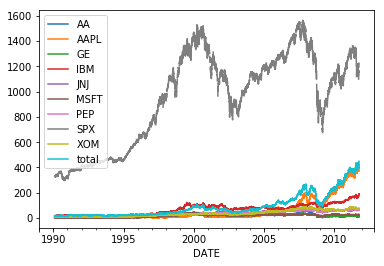

In [10]:
df.resample('D').sum().plot()